# New Yorkers Bike Data 

In this exercise, the goal is to record the number of bikes available every minute for an hour across all of New York City in order to see which station or set of stations is the most active in New York City for that hour. 

Activity is defined as the total number of bicycles taken out or returned in an hour. So if 2 bikes are brought in and 4 bikes are taken out, that station has an activity level of 6.

In the first line, we need to import the requests package to handle web requests. Requests allows us to download data from any online resource. 

In [1]:
import requests

In [2]:
r = requests.get('http://www.citibikenyc.com/stations/json')

See also: http://docs.python-requests.org/en/latest/

%install_ext https://raw.github.com/tkf/ipython-sqlitemagic/master/sqlitemagic.py #Installed sqlitemagic.py

In [3]:
%load_ext sql

//anaconda/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.4/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
%sql sqlite://

'Connected: None@None'

In [5]:
r.text

'{"executionTime":"2015-09-15 05:07:41 PM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":36,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":3,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2015-09-15 05:07:21 PM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":2,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":29,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2015-09-15 05:07:33 PM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":24,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"avai

If you're using Chrome, you can install the JSONView extension that will automatically format JSON files to be more readible in the browser.

In [6]:
r.json()

{'executionTime': '2015-09-15 05:07:41 PM',
 'stationBeanList': [{'altitude': '',
   'availableBikes': 3,
   'availableDocks': 36,
   'city': '',
   'id': 72,
   'landMark': '',
   'lastCommunicationTime': '2015-09-15 05:07:21 PM',
   'latitude': 40.76727216,
   'location': '',
   'longitude': -73.99392888,
   'postalCode': '',
   'stAddress1': 'W 52 St & 11 Ave',
   'stAddress2': '',
   'stationName': 'W 52 St & 11 Ave',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 39},
  {'altitude': '',
   'availableBikes': 29,
   'availableDocks': 2,
   'city': '',
   'id': 79,
   'landMark': '',
   'lastCommunicationTime': '2015-09-15 05:07:33 PM',
   'latitude': 40.71911552,
   'location': '',
   'longitude': -74.00666661,
   'postalCode': '',
   'stAddress1': 'Franklin St & W Broadway',
   'stAddress2': '',
   'stationName': 'Franklin St & W Broadway',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 33},

You can see the data is formatted into what's called JavaScript Object Notation (JSON). This is a standardized way of formatting data that helps display not only the values but the structure of the data, something that gets lost when data is displayed in a CSV. 

You access elements in a JSON in the same way you access items in a dictionary, which means you reference values by their key. To get a list of keys, you can use the keys() function, which will return a list of the keys available at that level of the JSON. 

In [7]:
r.json().keys()

dict_keys(['stationBeanList', 'executionTime'])

In [8]:
r.json()['executionTime']

'2015-09-15 05:07:41 PM'

The executionTime key gives a string with the time that the file was created. 

In [9]:
r.json()['stationBeanList']

[{'altitude': '',
  'availableBikes': 3,
  'availableDocks': 36,
  'city': '',
  'id': 72,
  'landMark': '',
  'lastCommunicationTime': '2015-09-15 05:07:21 PM',
  'latitude': 40.76727216,
  'location': '',
  'longitude': -73.99392888,
  'postalCode': '',
  'stAddress1': 'W 52 St & 11 Ave',
  'stAddress2': '',
  'stationName': 'W 52 St & 11 Ave',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 39},
 {'altitude': '',
  'availableBikes': 29,
  'availableDocks': 2,
  'city': '',
  'id': 79,
  'landMark': '',
  'lastCommunicationTime': '2015-09-15 05:07:33 PM',
  'latitude': 40.71911552,
  'location': '',
  'longitude': -74.00666661,
  'postalCode': '',
  'stAddress1': 'Franklin St & W Broadway',
  'stAddress2': '',
  'stationName': 'Franklin St & W Broadway',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 33},
 {'altitude': '',
  'availableBikes': 3,
  'availableDocks': 24,
  'city': '',
  'id': 82,
  'land

The stationBeanList key gives us the list of stations. 

In [10]:
r.json()['stationBeanList'][0]

{'altitude': '',
 'availableBikes': 3,
 'availableDocks': 36,
 'city': '',
 'id': 72,
 'landMark': '',
 'lastCommunicationTime': '2015-09-15 05:07:21 PM',
 'latitude': 40.76727216,
 'location': '',
 'longitude': -73.99392888,
 'postalCode': '',
 'stAddress1': 'W 52 St & 11 Ave',
 'stAddress2': '',
 'stationName': 'W 52 St & 11 Ave',
 'statusKey': 1,
 'statusValue': 'In Service',
 'testStation': False,
 'totalDocks': 39}

You can test that you have all the fields (important for setting up a database) by running the data through a loop and gathering all the fields together:

In [11]:
key_list = [] #unique list of keys for each station listing
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)

In [12]:
key_list 

['landMark',
 'postalCode',
 'lastCommunicationTime',
 'location',
 'testStation',
 'statusKey',
 'totalDocks',
 'latitude',
 'longitude',
 'stationName',
 'stAddress2',
 'stAddress1',
 'availableDocks',
 'availableBikes',
 'statusValue',
 'id',
 'altitude',
 'city']

Because the data is in json format, we need to do something a little different to import it. 

In [13]:
from pandas.io.json import json_normalize

df = json_normalize(r.json()['stationBeanList'])

Here, we are taking the stationBeanList and passing values associated with it to pandas to create a DataFrame out of the data instead of the whole JSON. 

## DESCRIPTIVE STATISTICS

### PLOTS:

Checking the range of values:

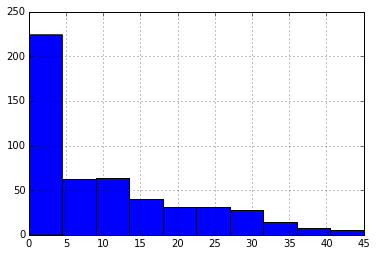

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df['availableBikes'].hist()


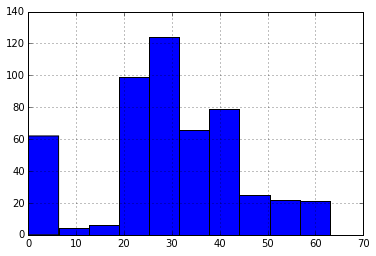

In [15]:
df['totalDocks'].hist()

SUMMARY: We have a simple JSON structure:

root
    |__executionTime
    |__stationBeanList
        |__availableDocks
        |__totalDocks
        |__city
        |__altitude
        |__stAddress2
        |__longitude
        |__lastCommunicationTime
        |__postalCode
        |__statusValue
        |__testStation
        |__stAddress1
        |__stationName
        |__landMark
        |__latitude
        |__statusKey
        |__availableBikes
        |__id
        |__location

We navigated using the keys() function to explore the various level (in this case, 2 levels below the root level), and we have a good idea of range values. 

### MEAN AND MEDIAN

In [16]:
df['totalDocks'].mean()

29.561023622047244

To only find the mean of the stations that were active, you would simply add a conditional, to filter the DataFrame (only the rows for the True values are in the result):

In [17]:
condition = (df['statusValue'] == 'In Service')
df[condition]['totalDocks'].mean()

33.857798165137616

In [18]:
df['totalDocks'].median()

31.0

In [19]:
df[df['statusValue'] == 'In Service']['totalDocks'].median()

31.0

In order to capture both changing and statis reference information in the dataset, we're going to create a reference table that tells us what info remains static and what is dynamic (or changing).

The SQL statement we'll be using to create a reference table looks like this:

#### STATIC TABLE:

Our first step is to create reference table with static info, with the station ID (id) number as the key value. 

CREATE TABLE citibike_reference (
    id INT PRIMARY KEY,
    totalDocks INT,
    city TEXT,
    altitude INT, 
    stAddress2 TEXT,
    longitude NUMERIC,
    postalCode TEXT,
    testStation TEXT,
    stAddress1 TEXT,
    stationName TEXT,
    landMark TEXT,
    latitude NUMERIC,
    location TEXT
)

Let's create the table to store the data:

In [20]:
%%sql
CREATE TABLE citibike_reference_copy (
    id INT PRIMARY KEY,
    totalDocks INT,
    city TEXT,
    altitude INT, 
    stAddress2 TEXT,
    longitude NUMERIC,
    postalCode TEXT,
    testStation TEXT,
    stAddress1 TEXT,
    stationName TEXT,
    landMark TEXT,
    latitude NUMERIC,
    location TEXT
)

Done.


[]

In [21]:
%sql select * from citibike_reference_copy

Done.


id,totalDocks,city,altitude,stAddress2,longitude,postalCode,testStation,stAddress1,stationName,landMark,latitude,location


Traditional approach:

In [32]:
import sqlite3 as lite
con = lite.connect('citi_bike.db') 
cur = con.cursor()
with con: 
    cur.execute('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT )')

We use the with keyword as a context manager. At the end of the indented code block, the transaction will commit (be saved) to the database. It's the same result as using con.commit() but generally using with is cleaner and more readable.

In [22]:
pwd

'/Users/AshRajBala'

Now let's populate the table with values:

In [34]:
sql = "INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)"

#for loop to populate values in the database
with con:
    for station in r.json()['stationBeanList']:
        #id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location)
        cur.execute(sql,(station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

The type of SQL query we're using in this case is called a "parameterized query", with ? standing in for values, which we reference in the cur.execute() function. 

#### DYNAMIC TABLE:

To get multiple readings by minute, the availablebikes table is going to need to be a little different. In this case, the station ID (id) is going to be the column name, but since the column name can't start with a number, you'll need to put a character in front of the number.

In [ ]:
#extract the column from the DataFrame and put them into a list
station_ids = df['id'].tolist() 

#add the '_' to the station name and also add the data type for SQLite
station_ids = ['_' + str(x) + ' INT' for x in station_ids]

#create the table
#in this case, we're concatentating the string and joining all the station ids (now with '_' and 'INT' added)
with con:
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " +  ", ".join(station_ids) + ");")

Now let's populate it with our values for available bikes:

In [ ]:
# a package with datetime objects
import time

# a package for parsing a string into a Python datetime object
from dateutil.parser import parse 

import collections


#take the string and parse it into a Python datetime object
exec_time = parse(r.json()['executionTime'])

We create an entry for the execution time by inserting it into the database:

In [ ]:
with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))

Then we iterate through the stations in the "stationBeanList":

In [ ]:
id_bikes = collections.defaultdict(int) #defaultdict to store available bikes by station

#loop through the stations in the station list
for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']

#iterate through the defaultdict to update the values in the database
with con:
    for k, v in id_bikes.items():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")

The function strftime() formats the time. It's alternate is strptime(), which is used to parse a string into the proper time format. 

In this case, strftime() is formatting the time into what's called Unix time, or Epoch time. It's the number of seconds since 1 January 1970 00:00:00 UTC. 